# Init

In [1]:
from Errors import *
import os, glob
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
EXPERIMENT = "A"
MULTIPLIERS = {
    "A": 1,
    "B": 10e-3,
    "C": 1,
    "K": 1
}
X_LABELS = {
    "A": "Initial Step Size, a",
    "B": "Scaling Factor Relative to Distance, b",
    "C": "Scaling Facotr Relative to Height, c",
    "K": "Number of Binary Search Steps, k"
}

EVAL_PATH = (
    r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Images\Eval"
    + f"\\Raymarching-{EXPERIMENT}"
)

plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams["font.size"] = 16  # Set the global font size
plt.rcParams["font.family"] = "serif"

def get_colors(length):
    return plt.cm.get_cmap("tab20", length)

In [3]:
def plot_error_data(x, data, keys_to_labels, error_name, figsize=(10, 8)):
    real_x = [a * MULTIPLIERS[EXPERIMENT] for a in x]

    fig, axes = plt.subplots(
        figsize=figsize, nrows=len(keys_to_labels), ncols=1, sharex=True
    )

    colors = get_colors(len(keys_to_labels))

    for i, (key, label) in enumerate(keys_to_labels.items()):
        ax = axes[i]
        y = [data[a][key] for a in x]
        ax.plot(real_x, y, marker="o", color=colors(0))
        ax.set_ylabel(label)
        ax.set_ylim(bottom=0)
        # legend = ax.legend(loc="upper left", frameon=True)
        # legend.get_frame().set_edgecolor("gray")  # Set the border color
        # legend.get_frame().set_facecolor("white")  # Set the background color

    plt.xlabel(X_LABELS[EXPERIMENT])
    plt.tight_layout()
    plt.show()

    # save the plot
    if not os.path.exists(EXPERIMENT):
        os.makedirs(EXPERIMENT)
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.png"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.svg"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )

In [4]:
def plot_error_data_with_bracket(x, data, keys_to_labels, error_name, num_brackets, bracket_labels, figsize=(10, 8)):
    real_x = [a * MULTIPLIERS[EXPERIMENT] for a in x]

    fig, axes = plt.subplots(
        figsize=figsize, nrows=len(keys_to_labels), ncols=1, sharex=True
    )

    colors = get_colors(len(bracket_labels))

    for b in range(num_brackets):
        for i, (key, label) in enumerate(keys_to_labels.items()):
            ax = axes[i]
            y = [data[a][b][key] for a in x]
            ax.plot(real_x, y, marker="o", color=colors(b), label=bracket_labels[b])
            ax.set_ylabel(label)
            # ax.set_ylim(bottom=0)
            legend = ax.legend(loc="upper left", frameon=True)
            legend.get_frame().set_edgecolor("gray")  # Set the border color
            legend.get_frame().set_facecolor("white")  # Set the background color

    plt.xlabel(X_LABELS[EXPERIMENT])
    plt.tight_layout()
    plt.show()

    # save the plot
    if not os.path.exists(EXPERIMENT):
        os.makedirs(EXPERIMENT)
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.png"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.svg"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )

# IDE

In [5]:
ide_folders = [
    folder
    for folder in os.listdir(EVAL_PATH)
    if folder.startswith(EXPERIMENT) and os.path.isdir(os.path.join(EVAL_PATH, folder))
]

ide_folders.sort( key=lambda x: path_to_value(x) )

print(ide_folders)

['A0.1-IDE_20240416_221112', 'A1-IDE_20240416_221253', 'A5-IDE_20240416_221332', 'A10-IDE_20240416_221442', 'A20-IDE_20240416_232524', 'A50-IDE_20240416_232613', 'A100-IDE_20240416_233451']


In [6]:
ide_results = {}
for ide_folder in ide_folders:
    folder_path = os.path.join(EVAL_PATH, ide_folder)
    for file_name in os.listdir(folder_path):
        if file_name.startswith("IDE_1") and file_name.endswith(".png"):
            ide_path = os.path.join(folder_path, file_name)
            ide_results[path_to_value(folder_path)] = IDE(ide_path, True)
    

For A0.1-IDE_20240416_221112:
	Among 360000 pixels:
	Number of missed intersections (-1): 129
	Number of no intersections (-100): 28784
	Average IDE value: 16.927722930908203
	Median IDE value: 0.04974365234375
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60600.81640625


For A1-IDE_20240416_221253:
	Among 360000 pixels:
	Number of missed intersections (-1): 143
	Number of no intersections (-100): 28784
	Average IDE value: 16.884716033935547
	Median IDE value: 0.0679931640625
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60622.28515625
For A5-IDE_20240416_221332:
	Among 360000 pixels:
	Number of missed intersections (-1): 138
	Number of no intersections (-100): 28784
	Average IDE value: 18.956085205078125
	Median IDE value: 0.1632080078125
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60928.57421875
For A10-IDE_20240416_221442:
	Among 360000 pixels:
	Number of missed intersections (-1): 137
	Number of no intersections (-100): 28784
	Average IDE value: 20.51068687438965
	Median IDE value: 0.2945556640625
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 53701.73828125
For A20-IDE_20240416_232524:
	Among 360000 pixels:
	Number of missed intersections (-1): 154
	Number of no intersections (-100): 28784
	Average IDE value: 25.16600227

In [7]:
print(ide_results)

{0.1: {'num_missed_intersection_IDE': 129, 'num_no_intersection_IDE': 28784, 'average_IDE': 16.927723, 'highest_IDE': 60600.816, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.049743652}, 1.0: {'num_missed_intersection_IDE': 143, 'num_no_intersection_IDE': 28784, 'average_IDE': 16.884716, 'highest_IDE': 60622.285, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.067993164}, 5.0: {'num_missed_intersection_IDE': 138, 'num_no_intersection_IDE': 28784, 'average_IDE': 18.956085, 'highest_IDE': 60928.574, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.16320801}, 10.0: {'num_missed_intersection_IDE': 137, 'num_no_intersection_IDE': 28784, 'average_IDE': 20.510687, 'highest_IDE': 53701.74, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.29455566}, 20.0: {'num_missed_intersection_IDE': 154, 'num_no_intersection_IDE': 28784, 'average_IDE': 25.166002, 'highest_IDE': 60610.434, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.59124756}, 50.0: {'num_missed_intersection_IDE': 158, 'num_no_intersection_IDE': 28784,

[0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]


C:\Users\user\AppData\Local\Temp\ipykernel_35040\1236200634.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


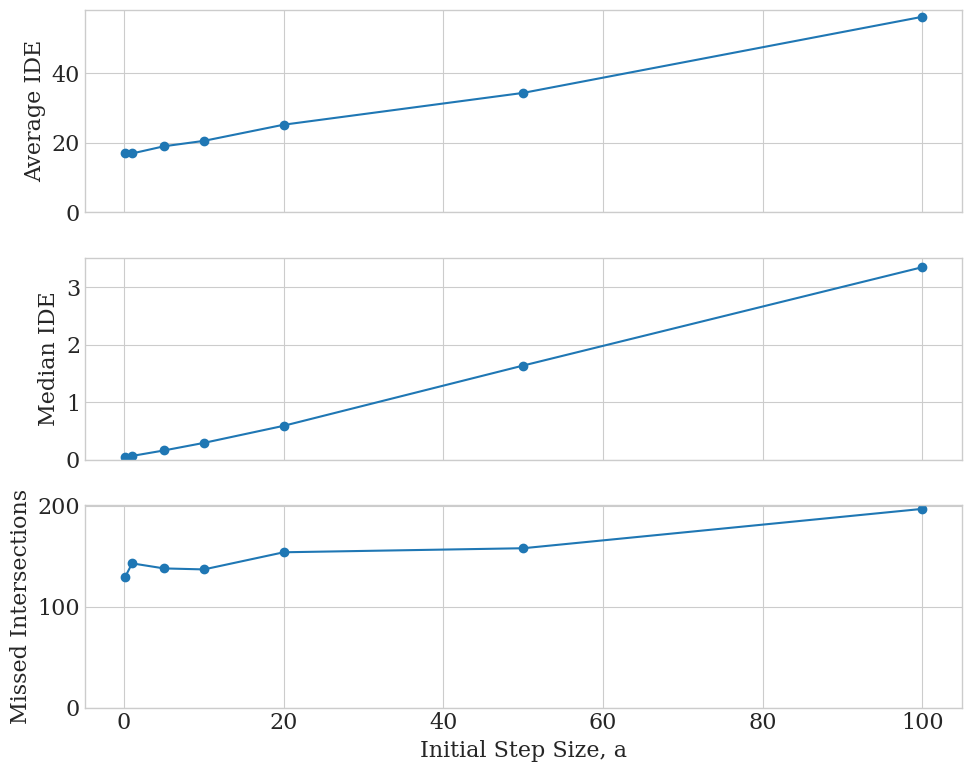

In [8]:
# Extract the keys and values from ide_results dictionary
x = list(ide_results.keys())
x = [float(a) for a in x]
x.sort()
print(x)


keys_to_labels = {
    "average_IDE": "Average IDE",
    "median_IDE": "Median IDE",
    "num_missed_intersection_IDE": "Missed Intersections",
}


plot_error_data(x, ide_results, keys_to_labels, "IDE")

# HDE

In [9]:
hde_paths = glob.glob(os.path.join(EVAL_PATH, f'{EXPERIMENT}*.png'))

hde_paths.sort( key=lambda x: path_to_value(x) )
print(hde_paths)

['C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A0.1-HDE_20240416_221122.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A1-HDE_20240416_221301.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A5-HDE_20240416_221340.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A10-HDE_20240416_221450.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A20-HDE_20240416_232531.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A50-HDE_20240416_232620.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Im

In [10]:
hde_results = {}
for hde_path in hde_paths:
    hde_results[path_to_value(hde_path)] = HDE(hde_path, True)

For A0.1-HDE_20240416_221122.png:
	Among 360000 pixels:
	Number of no intersections: 28913
	Average HDE value: 0.7999324798583984
	Lowest HDE value: 2.648448571562767e-09
	Highest HDE value: 182.1120147705078
For A1-HDE_20240416_221301.png:
	Among 360000 pixels:
	Number of no intersections: 28927
	Average HDE value: 0.8175764679908752
	Lowest HDE value: 1.2386590242385864e-07
	Highest HDE value: 183.05104064941406
For A5-HDE_20240416_221340.png:
	Among 360000 pixels:
	Number of no intersections: 28922
	Average HDE value: 0.9292274713516235
	Lowest HDE value: 1.9717845134437084e-07
	Highest HDE value: 205.8627166748047
For A10-HDE_20240416_221450.png:
	Among 360000 pixels:
	Number of no intersections: 28921
	Average HDE value: 1.08683443069458
	Lowest HDE value: 5.308538675308228e-07
	Highest HDE value: 187.35000610351562
For A20-HDE_20240416_232531.png:
	Among 360000 pixels:
	Number of no intersections: 28938
	Average HDE value: 1.4274516105651855
	Lowest HDE value: 7.927883416414261e-

C:\Users\user\AppData\Local\Temp\ipykernel_35040\1236200634.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


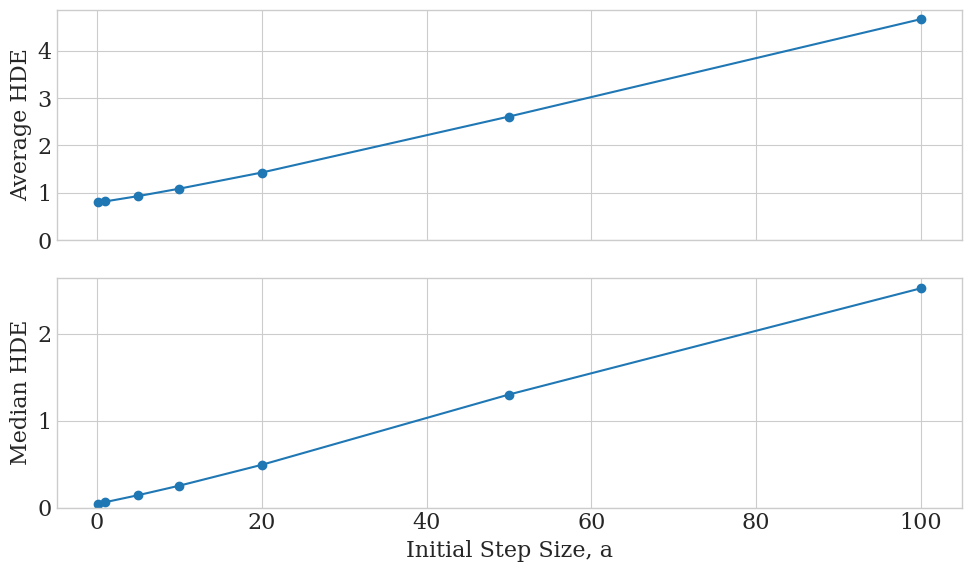

In [11]:
x = [float(a) for a in hde_results.keys()]

keys_to_labels = {
    "average_HDE": "Average HDE",
    "median_HDE": "Median HDE",
}

plot_error_data(x, hde_results, keys_to_labels, "HDE", figsize=(10, 6))

# Performance

In [12]:
csv_path = EVAL_PATH + f"\\{EXPERIMENT}-perf.csv"
csv_path

'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A-perf.csv'

In [13]:
df: DataFrame = pd.read_csv(csv_path)

print(df)

       A  Frame Time
0    0.1   34.863598
1    1.0   31.567360
2    5.0   28.222269
3   10.0   24.602036
4   20.0   18.303118
5   50.0   16.265162
6  100.0   12.113853


C:\Users\user\AppData\Local\Temp\ipykernel_35040\1236200634.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


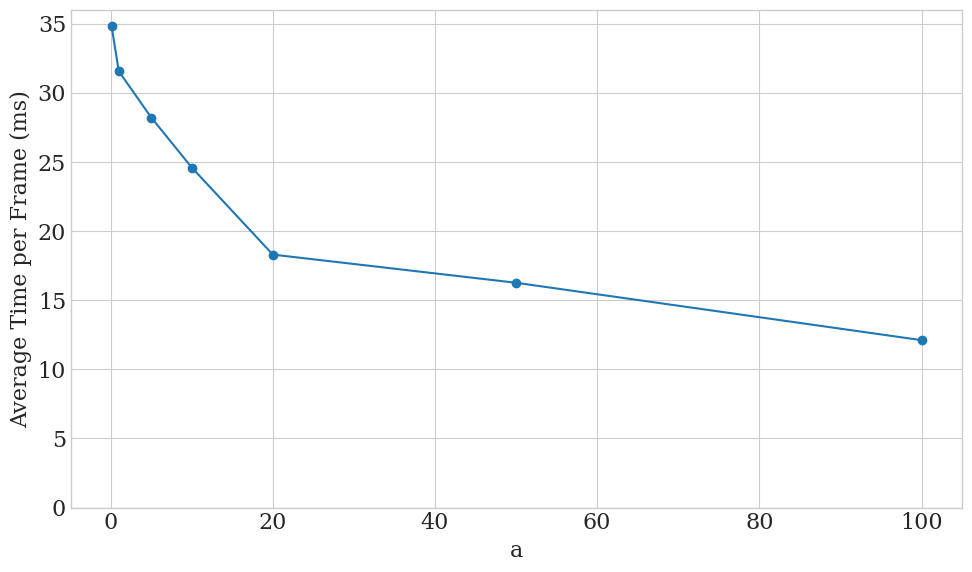

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = get_colors(1)
ax.plot(df.iloc[:, 0], df.iloc[:, 1], label="FPS", marker="o", color=colors(0))
ax.set_ylim(bottom=0)
plt.xlabel("a")
plt.ylabel("Average Time per Frame (ms)")
plt.tight_layout()

fig.savefig(
    os.path.join(EXPERIMENT, f"{EXPERIMENT}-Performance.png"),
    facecolor=fig.get_facecolor(),
    edgecolor=fig.get_edgecolor(),
)
fig.savefig(
    os.path.join(EXPERIMENT, f"{EXPERIMENT}-Performance.svg"),
    facecolor=fig.get_facecolor(),
    edgecolor=fig.get_edgecolor(),
)

# Merge

In [15]:
merged_results = ide_results.copy()

for key in hde_results.keys():
    merged_results[key].update(hde_results[key])


for i, key in enumerate(merged_results.keys()):
    merged_results[key]["frame_time"] = df.iloc[i, 1]

print(merged_results)


{0.1: {'num_missed_intersection_IDE': 129, 'num_no_intersection_IDE': 28784, 'average_IDE': 16.927723, 'highest_IDE': 60600.816, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.049743652, 'num_no_intersection_HDE': 28913, 'average_HDE': 0.7999325, 'highest_HDE': 182.11201, 'lowest_HDE': 2.6484486e-09, 'median_HDE': 0.046325337, 'frame_time': 34.863598}, 1.0: {'num_missed_intersection_IDE': 143, 'num_no_intersection_IDE': 28784, 'average_IDE': 16.884716, 'highest_IDE': 60622.285, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.067993164, 'num_no_intersection_HDE': 28927, 'average_HDE': 0.81757647, 'highest_HDE': 183.05104, 'lowest_HDE': 1.238659e-07, 'median_HDE': 0.062067833, 'frame_time': 31.56736}, 5.0: {'num_missed_intersection_IDE': 138, 'num_no_intersection_IDE': 28784, 'average_IDE': 18.956085, 'highest_IDE': 60928.574, 'lowest_IDE': 6.1035156e-05, 'median_IDE': 0.16320801, 'num_no_intersection_HDE': 28922, 'average_HDE': 0.9292275, 'highest_HDE': 205.86272, 'lowest_HDE': 1.9717845e-07

C:\Users\user\AppData\Local\Temp\ipykernel_35040\1236200634.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


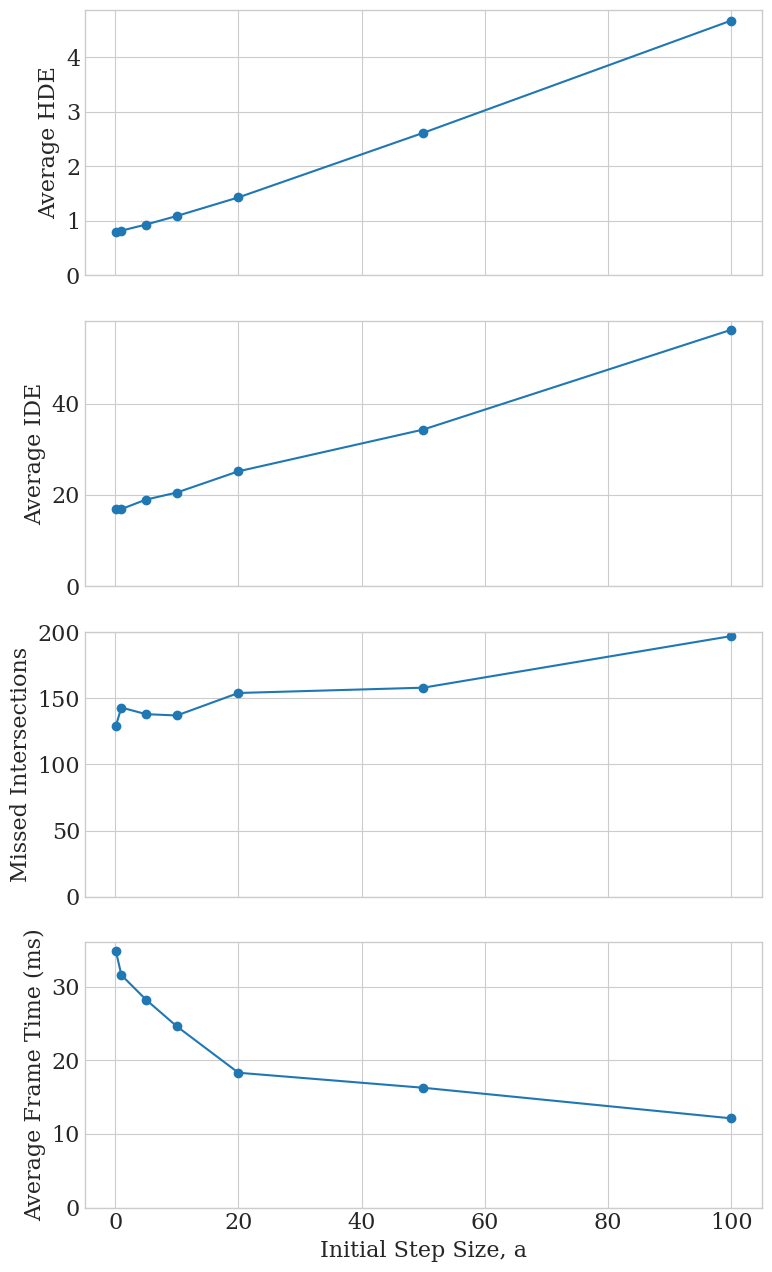

In [16]:
x = [float(a) for a in hde_results.keys()]

keys_to_labels = {
    "average_HDE": "Average HDE",
    "average_IDE": "Average IDE",
    "num_missed_intersection_IDE": "Missed Intersections",
    "frame_time": "Average Frame Time (ms)",
    # "median_HDE": "Median HDE",
}

plot_error_data(x, merged_results, keys_to_labels, "Merged", figsize=(8, 13))

# Errors with distances brackets

In [17]:
def IDE_distance_constraint(image_path, distance_path, num_brackets, print_output=False, display_image=False):
    decoded = decode(image_path)

    img = Image.open(distance_path)
    img_rgba = img.convert("RGBA")
    distances = np.array(img_rgba, dtype=np.uint32)
    print(distances[:,:,0][decoded>0])

    result = []

    for i in range(num_brackets):
        min_distance = 255 / num_brackets * i
        max_distance = 255 / num_brackets * (i + 1)
        # consider only the red channel
        mask = (distances[:, :, 0] >= min_distance) & (distances[:, :, 0] <= max_distance)
        print(f"In mask: {np.sum(mask)} pixels for distance {min_distance} to {max_distance}")

        # treat pixels outside the distance range as -100 -- no intersection
        masked = np.where(mask, decoded, -100)

        total_pixels = masked.size

        # count the number of -1 and -100 values
        num_missed_intersection = np.sum(masked == -1)
        num_no_intersection = np.sum(masked == -100)

        # average the positive values
        positive_values = masked[masked > 0]
        print(f"Positive values: {len(positive_values)}")
        average_IDE = np.mean(positive_values)
        highest_value = np.max(positive_values)
        lowest_value = np.min(positive_values)
        median_value = np.median(positive_values)

        result_dict = {
            "num_missed_intersection_IDE": num_missed_intersection,
            "num_no_intersection": num_no_intersection,
            "average_IDE": average_IDE,
            "highest_IDE": highest_value,
            "lowest_IDE": lowest_value,
            "median_IDE": median_value
        }
        result.append(result_dict)

        if print_output:
            print((
                f"For {image_path.split("\\")[-2]}:\n"
                f"\tAmong {total_pixels} pixels:\n"
                f"\tNumber of missed intersections (-1): {num_missed_intersection}\n"
                f"\tNumber of no intersections (-100): {num_no_intersection}\n"
                f"\tAverage IDE value: {average_IDE}\n"
                f"\tMedian IDE value: {median_value}\n"
                f"\tLowest IDE value: {lowest_value}\n"
                f"\tHighest IDE value: {highest_value}"
            ))

        decoded_image = decoded_IDE_to_image(decoded)
        if display_image:
            display(decoded_image)
    
    return result

In [18]:
def HDE_distance_constraint(image_path, distance_path, num_brackets, print_output=False, display_image=False):
    decoded = decode(image_path)

    img = Image.open(distance_path)
    img_rgba = img.convert("RGBA")
    distances = np.array(img_rgba, dtype=np.uint32)
    print(distances[:,:,0][decoded>0])

    result = []

    for i in range(num_brackets):
        min_distance = 255 / num_brackets * i
        max_distance = 255 / num_brackets * (i + 1)
        # consider only the red channel
        mask = (distances[:, :, 0] >= min_distance) & (distances[:, :, 0] <= max_distance)
        print(f"In mask: {np.sum(mask)} pixels for distance {min_distance} to {max_distance}")

        # treat pixels outside the distance range as -1 -- no intersection
        masked = np.where(mask, decoded, -1)

        total_pixels = masked.size

        # count the number of -1 and -100 values
        num_no_intersection = np.sum(masked == -1)

        # average the positive values
        positive_values = masked[masked > 0]
        print(f"Positive values: {len(positive_values)}")
        average_HDE = np.mean(positive_values)
        highest_value = np.max(positive_values)
        lowest_value = np.min(positive_values)
        median_value = np.median(positive_values)

        result_dict = {
            "num_no_intersection_HDE": num_no_intersection,
            "average_HDE": average_HDE,
            "highest_HDE": highest_value,
            "lowest_HDE": lowest_value,
            "median_HDE": median_value
        }
        result.append(result_dict)

        if print_output:
            print((
                f"For {image_path.split("\\")[-2]}:\n"
                f"\tAmong {total_pixels} pixels:\n"
                f"\tNumber of no intersections (-100): {num_no_intersection}\n"
                f"\tAverage HDE value: {average_HDE}\n"
                f"\tMedian HDE value: {median_value}\n"
                f"\tLowest HDE value: {lowest_value}\n"
                f"\tHighest HDE value: {highest_value}"
            ))

        decoded_image = decoded_HDE_to_image(decoded)
        if display_image:
            display(decoded_image)
    
    return result

In [19]:
BRACKETS = 3
if EXPERIMENT == "B":
    bracket_ide_results = {}
    bracket_hde_results = {}
    for ide_folder, hde_path in zip(ide_folders, hde_paths):
        folder_path = os.path.join(EVAL_PATH, ide_folder)
        ide_path, distance_path = None, None
        for file_name in os.listdir(folder_path):
            if file_name.startswith("IDE_1") and file_name.endswith(".png"):
                ide_path = os.path.join(folder_path, file_name)
            if file_name.startswith("IDE_3") and file_name.endswith(".png"):
                distance_path = os.path.join(folder_path, file_name)

        bracket_ide_results[path_to_value(folder_path)] = IDE_distance_constraint(
            ide_path, distance_path, BRACKETS, True
        )
        bracket_hde_results[path_to_value(folder_path)] = HDE_distance_constraint(
            hde_path, distance_path, BRACKETS, True
        )

In [20]:
print(bracket_ide_results)
print(bracket_hde_results)

merged_bracket_results = bracket_ide_results.copy()
for key in merged_bracket_results.keys():
    for i,list_item in enumerate(merged_bracket_results[key]):
        merged_bracket_results[key][i].update(bracket_hde_results[key][i])
        
print(merged_bracket_results)

NameError: name 'bracket_ide_results' is not defined

: 

[1.0, 2.0, 4.0, 10.0, 20.0, 50.0, 100.0]


C:\Users\user\AppData\Local\Temp\ipykernel_25528\773859987.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


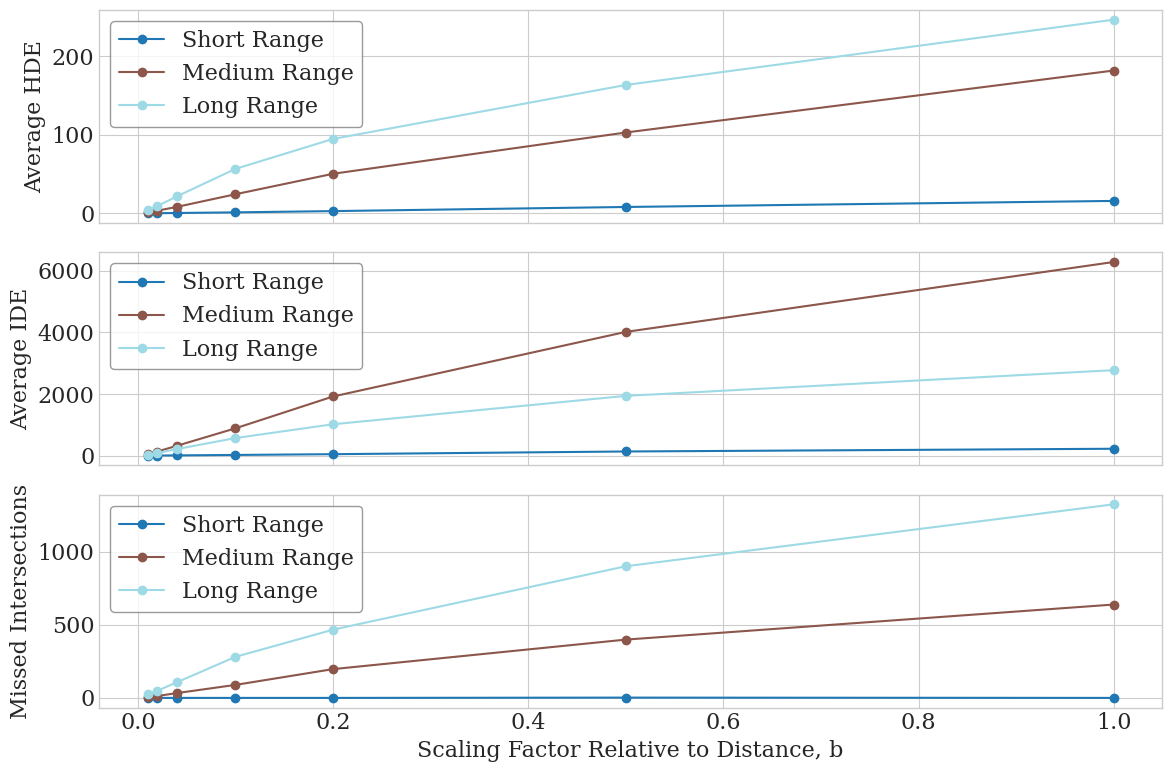

In [ ]:
if EXPERIMENT == "B":
    # Extract the keys and values from ide_results dictionary

    x = list(bracket_ide_results.keys())

    x = [float(a) for a in x]

    x.sort()

    print(x)

    keys_to_labels = {
        "average_HDE": "Average HDE",
        "average_IDE": "Average IDE",
        # "median_IDE": "Median IDE",
        "num_missed_intersection_IDE": "Missed Intersections",
    }

    plot_error_data_with_bracket(
        x,
        merged_bracket_results,
        keys_to_labels,
        "Ranges",
        BRACKETS,
        ["Short Range", "Medium Range", "Long Range"],
        figsize=(12, 8),
    )